In [1]:
import os
import shutil
from pathlib import Path

current_dir = Path(os.getcwd()).absolute()
pics_dir = current_dir.joinpath('Team Pics')

#make paths to training, validation, and test directories
train_dir = current_dir.joinpath('train')
validation_dir = current_dir.joinpath('validation')
test_dir = current_dir.joinpath('test')

print(current_dir)

C:\Users\loosm\DSC-680 Applied Data Science\Project 1


In [3]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical')

C:\Users\loosm\Anaconda\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Found 4176 images belonging to 14 classes.
Found 1382 images belonging to 14 classes.
Found 1393 images belonging to 14 classes.


In [4]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 14)


In [5]:
for data_batch, labels_batch in train_generator:
#     print('data batch shape:', data_batch)
    print('labels batch shape:', labels_batch)
    break

labels batch shape: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


## Model with 60 epochs

In [6]:
from keras import models
from keras import layers
from keras import optimizers

#build covnet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(150, 150, 3)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(14, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
history = model.fit_generator(
train_generator,
steps_per_epoch=200,
epochs=60,
validation_data=validation_generator,
validation_steps=50
)

C:\Users\loosm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
200/200 [==============================] - 90s 448ms/step - loss: 2.5783 - accuracy: 0.1031 - val_loss: 2.2872 - val_accuracy: 0.1693
Epoch 2/60
200/200 [==============================] - 80s 397ms/step - loss: 2.2350 - accuracy: 0.1968 - val_loss: 2.1819 - val_accuracy: 0.2156
Epoch 3/60
200/200 [==============================] - 81s 405ms/step - loss: 2.1266 - accuracy: 0.2424 - val_loss: 2.0625 - val_accuracy: 0.2735
Epoch 4/60
200/200 [==============================] - 81s 405ms/step - loss: 2.0213 - accuracy: 0.2973 - val_loss: 1.9528 - val_accuracy: 0.3162
Epoch 5/60
200/200 [==============================] - 81s 404ms/step - loss: 1.9566 - accuracy: 0.3344 - val_loss: 1.8558 - val_accuracy: 0.3654
Epoch 6/60
200/200 [==============================] - 81s 405ms/step - loss: 1.8756 - accuracy: 0.3539 - val_loss: 1.7696 - val_accuracy: 0.4132
Epoch 7/60
200/200 [==============================] - 82s 408ms/step - loss: 1.8394 - accuracy: 0.3666 - val_loss: 1.8481 - val_ac

200/200 [==============================] - 99s 490ms/step - loss: 1.0493 - accuracy: 0.6650 - val_loss: 1.2807 - val_accuracy: 0.6143
Epoch 58/60
200/200 [==============================] - 88s 440ms/step - loss: 1.0271 - accuracy: 0.6600 - val_loss: 1.3035 - val_accuracy: 0.6020
Epoch 59/60
200/200 [==============================] - 91s 453ms/step - loss: 1.0247 - accuracy: 0.6644 - val_loss: 1.2875 - val_accuracy: 0.5948
Epoch 60/60
200/200 [==============================] - 89s 443ms/step - loss: 1.0210 - accuracy: 0.6605 - val_loss: 1.1949 - val_accuracy: 0.6454


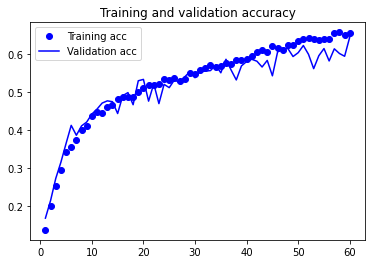

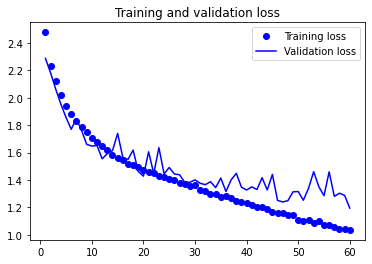

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [36]:
loss, accuracy = model.evaluate_generator(test_generator)
print(f'Test Loss: {loss}\nTest Accuracy:{accuracy}')

Test Loss: 1.2470808029174805
Test Accuracy:0.6288585662841797


In [37]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}\nTest Accuracy:{accuracy}')

140/140 [==============================] - 9s 66ms/step - loss: 1.2471 - accuracy: 0.6289
Test Loss: 1.247080683708191
Test Accuracy:0.6288585662841797


## Model with 40 epochs

In [12]:
#build covnet
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(150, 150, 3)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(14, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 73, 73, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [13]:
history2 = model2.fit_generator(
train_generator,
steps_per_epoch=200,
epochs=40,
validation_data=validation_generator,
validation_steps=50
)

Epoch 1/40
200/200 [==============================] - 84s 410ms/step - loss: 2.5855 - accuracy: 0.1033 - val_loss: 2.2500 - val_accuracy: 0.1900
Epoch 2/40
200/200 [==============================] - 83s 414ms/step - loss: 2.2260 - accuracy: 0.2040 - val_loss: 2.0694 - val_accuracy: 0.2840
Epoch 3/40
200/200 [==============================] - 82s 407ms/step - loss: 2.1263 - accuracy: 0.2432 - val_loss: 1.9928 - val_accuracy: 0.3100
Epoch 4/40
200/200 [==============================] - 81s 404ms/step - loss: 2.0133 - accuracy: 0.2943 - val_loss: 1.9951 - val_accuracy: 0.3200
Epoch 5/40
200/200 [==============================] - 86s 431ms/step - loss: 1.9261 - accuracy: 0.3282 - val_loss: 1.8239 - val_accuracy: 0.3940
Epoch 6/40
200/200 [==============================] - 82s 410ms/step - loss: 1.8883 - accuracy: 0.3661 - val_loss: 1.8152 - val_accuracy: 0.3760
Epoch 7/40
200/200 [==============================] - 83s 412ms/step - loss: 1.8384 - accuracy: 0.3904 - val_loss: 1.7248 - val_ac

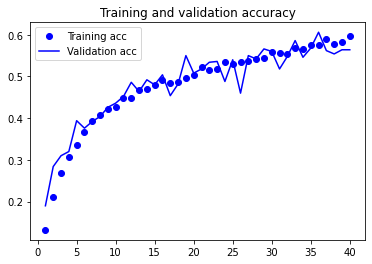

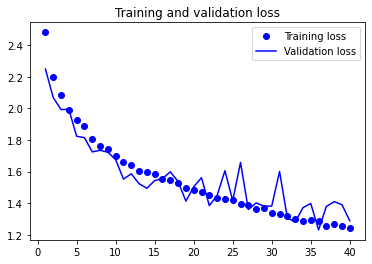

In [14]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
loss, accuracy = model2.evaluate_generator(test_generator)
print(f'Test Loss: {loss}\nTest Accuracy:{accuracy}')

Test Loss: 1.3712424039840698
Test Accuracy:0.5513280630111694


## Model with 80 epochs

In [16]:
#build covnet
model80 = models.Sequential()
model80.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(150, 150, 3)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model80.add(layers.MaxPooling2D((2, 2)))
model80.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model80.add(layers.MaxPooling2D((2, 2)))
model80.add(layers.Conv2D(128, (3, 3), activation='relu'))
model80.add(layers.MaxPooling2D((2, 2)))
model80.add(layers.Conv2D(128, (3, 3), activation='relu'))
model80.add(layers.MaxPooling2D((2, 2)))
model80.add(layers.Flatten())
model80.add(layers.Dense(512, activation='relu'))
model80.add(layers.Dense(14, activation='softmax'))

model80.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])
model80.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 73, 73, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [17]:
history80 = model80.fit_generator(
train_generator,
steps_per_epoch=200,
epochs=80,
validation_data=validation_generator,
validation_steps=50
)

Epoch 1/80
200/200 [==============================] - 79s 388ms/step - loss: 2.6030 - accuracy: 0.1014 - val_loss: 2.2476 - val_accuracy: 0.2420
Epoch 2/80
200/200 [==============================] - 81s 407ms/step - loss: 2.2804 - accuracy: 0.1912 - val_loss: 2.0830 - val_accuracy: 0.2680
Epoch 3/80
200/200 [==============================] - 74s 370ms/step - loss: 2.1303 - accuracy: 0.2551 - val_loss: 1.9537 - val_accuracy: 0.3420
Epoch 4/80
200/200 [==============================] - 77s 384ms/step - loss: 2.0223 - accuracy: 0.3095 - val_loss: 2.1934 - val_accuracy: 0.2420
Epoch 5/80
200/200 [==============================] - 72s 357ms/step - loss: 1.9772 - accuracy: 0.3218 - val_loss: 1.9096 - val_accuracy: 0.3500
Epoch 6/80
200/200 [==============================] - 71s 354ms/step - loss: 1.9270 - accuracy: 0.3258 - val_loss: 1.9982 - val_accuracy: 0.2960
Epoch 7/80
200/200 [==============================] - 78s 388ms/step - loss: 1.8423 - accuracy: 0.3670 - val_loss: 1.7279 - val_ac

200/200 [==============================] - 84s 420ms/step - loss: 1.0626 - accuracy: 0.6383 - val_loss: 1.5870 - val_accuracy: 0.5600
Epoch 58/80
200/200 [==============================] - 82s 409ms/step - loss: 1.0779 - accuracy: 0.6287 - val_loss: 1.4308 - val_accuracy: 0.5720
Epoch 59/80
200/200 [==============================] - 79s 395ms/step - loss: 1.0554 - accuracy: 0.6486 - val_loss: 1.3025 - val_accuracy: 0.5940
Epoch 60/80
200/200 [==============================] - 85s 422ms/step - loss: 1.0501 - accuracy: 0.6487 - val_loss: 1.5057 - val_accuracy: 0.5620
Epoch 61/80
200/200 [==============================] - 83s 413ms/step - loss: 1.0452 - accuracy: 0.6572 - val_loss: 1.3111 - val_accuracy: 0.5940
Epoch 62/80
200/200 [==============================] - 83s 416ms/step - loss: 1.0236 - accuracy: 0.6627 - val_loss: 1.3486 - val_accuracy: 0.5880
Epoch 63/80
200/200 [==============================] - 82s 408ms/step - loss: 1.0486 - accuracy: 0.6705 - val_loss: 1.5002 - val_accurac

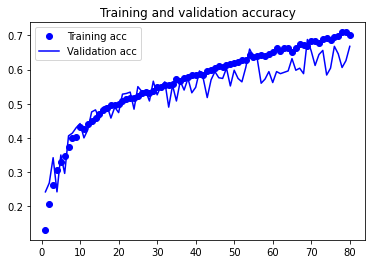

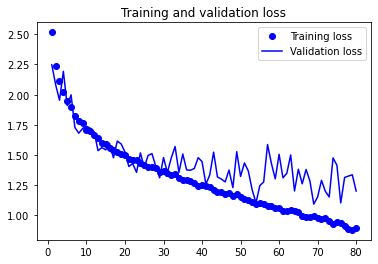

In [18]:
acc = history80.history['accuracy']
val_acc = history80.history['val_accuracy']
loss = history80.history['loss']
val_loss = history80.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical')

loss, accuracy = model80.evaluate(test_generator)
print(f'Test Loss: {loss}\nTest Accuracy:{accuracy}')

Found 1393 images belonging to 14 classes.


C:\Users\loosm\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test Loss: 1.3677349090576172
Test Accuracy:0.612347424030304


## Analysis of Model

In [95]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical',
    shuffle=False)

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
matrix = confusion_matrix(test_generator.classes, y_pred)
print(matrix)
print('Classification Report')
target_names = ['Illinois','Indiana','Iowa','Maryland','Michigan','Michigan St','Minnesota',
                'Nebraska','Northwestern','Ohio St','Penn St','Purdue','Rutgers', 'Wisconsin']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))
print(accuracy_score(test_generator.classes, y_pred))
print(accuracy_score(test_generator.classes, y_pred, normalize=False))

matrix.diagonal()/matrix.sum(axis=1)

Found 1393 images belonging to 14 classes.
Confusion Matrix
[[82  3  1  1  1  0  3  0  3  2  0  0  3  1]
 [ 1 43  0  7  2  0  0 10  1  8  1  1 18  8]
 [ 1  0 85  2  0  1  1  1  2  0  4  3  0  0]
 [ 5  4  4 61  1  2  3  3  1  1  2  1  7  3]
 [ 1  1  7  0 83  0  0  0  1  0  1  5  1  0]
 [ 0  1  0  0  2 82  1  0  1  1  2  5  4  1]
 [ 2  0  8  3  4  1 73  0  1  0  0  7  0  0]
 [ 1  7  0  9  0  1  3 34  2  9  1  0 17 10]
 [ 3  3  0  0  1  1  0  0 67  0 14  6  1  2]
 [11  3  0 13  1  1  2  6  0 50  0  0 10  3]
 [ 1  2  4  0  1  3  1  2  9  1 77  3  0  0]
 [ 2  0  8  0  3  3  1  0  4  0 12 61  5  1]
 [ 2  9  1 12  2  2  0  6  2  5  3  2 49  5]
 [ 0  9  0  8  0  1  5 14  2 17  1  1 13 29]]
Classification Report
              precision    recall  f1-score   support

    Illinois       0.73      0.82      0.77       100
     Indiana       0.51      0.43      0.46       100
        Iowa       0.72      0.85      0.78       100
    Maryland       0.53      0.62      0.57        98
    Michigan    

array([0.82      , 0.43      , 0.85      , 0.62244898, 0.83      ,
       0.82      , 0.73737374, 0.36170213, 0.68367347, 0.5       ,
       0.74038462, 0.61      , 0.49      , 0.29      ])

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target_names = ['Illinois','Indiana','Iowa','Maryland','Michigan','Michigan St','Minnesota',
                'Nebraska','Northwestern','Ohio St','Penn St','Purdue','Rutgers', 'Wisconsin']

accuracy = [0.8201, 0.43, 0.85, 0.62, 0.83, 0.82, 0.7401, 0.36, 0.68, 0.5,0.74, 0.61, 0.49, 0.29]

d = {'Team':target_names,'Accuracy':accuracy}
df = pd.DataFrame(d, columns=['Team','Accuracy'])

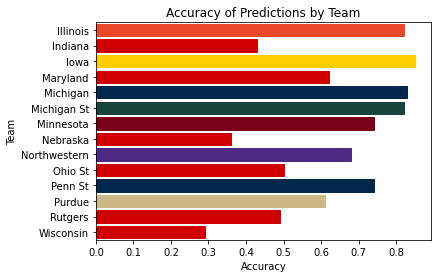

In [130]:
ax = sns.barplot(x='Accuracy', y='Team', data=df)
for bar in ax.patches:
    if bar.get_width() == 0.43 or bar.get_width() == 0.62 or bar.get_width() == 0.32 or bar.get_width() == 0.36 or bar.get_width() == 0.5 or bar.get_width() == 0.49 or bar.get_width() == 0.29:
        bar.set_color('#d00000')   
    elif bar.get_width() == 0.83 or bar.get_width() == 0.74:
        bar.set_color('#00274C')   
    elif bar.get_width() == 0.74:
        bar.set_color('#041E42') 
    elif bar.get_width() == 0.82:
        bar.set_color('#18453B')   
    elif bar.get_width() == 0.8201:
        bar.set_color('#E84A27')   
    elif bar.get_width() == 0.85:
        bar.set_color('#FFCD00')  
    elif bar.get_width() == 0.7401:
        bar.set_color('#7A0019')  
    elif bar.get_width() == 0.68:
        bar.set_color('#4E2A84')  
    elif bar.get_width() == 0.61:
        bar.set_color('#CEB888') 
    else:
        bar.set_color('grey')
plt.title('Accuracy of Predictions by Team')
plt.show()